#What is a Laungmuir Probe?
A Langmuir Probe is a piece of metal that you put into a plasma! You can then connect it to an amp-meter and a voltage source (or a combined source meter) to measure the amount of current you can collect at different voltage biases. Surprisingly, you can learn a lot about the plasma with the simple current vs. voltage curve that you get from such a probe, namely estimates of the **electron temperature** $(T_e)$, **plasma potential** $(V_p)$, and **electron density** $(n_e)$. If you put a more effort into the analysis then you can also extract the **ion density** $(n_i)$, the **ion temperature** $(T_i)$, and ever the entier **electron energy distribution function** (EEDF) or $f_e(V)$ of the plasma. It's literally like a thermometer for diagnosing a plasma, which was actually named after blood plasma.


<p align="center">
<img width="400" src="https://i0.wp.com/davidpace.com/wp-content/uploads/2015/11/lpa-circSetup.jpg?ssl=1">  ->  <img width="300" src="https://lasers.llnl.gov/content/assets/images/science/plasma_properties.jpg">
</p>

- Langmuir probes are the basic diagnostic tool for all plasma experiments
- The semiconductor industry uses Langmuir probes a lot for diagnostics

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.signal import savgol_filter
from pathlib import Path
from pprint import pprint
import astropy.units as u
from astropy.units import cds

ModuleNotFoundError: No module named 'astropy'

#*I-V* characteristic of the Debye sheath

The beginning of Langmuir probe theory is the current–voltage characteristic (*I–V* characteristic) of the Debye (plasma) sheath, that is, the current density flowing to a surface in a plasma as a function of the voltage drop across the sheath. The analysis presented here indicates how the **electron temperature**, **plasma potential**, and **electron density** can be derived from the *I–V* characteristic. In some situations, a more detailed analysis can yield information on the **ion density** $(n_i)$, the **ion temperature** $(T_i)$, or the **electron energy distribution function** (EEDF) or $f_e(v)$.

In [ ]:
# Load the data from a file and create the Characteristic object
# Load the bias and current values stored in the .p pickle file.
numpy_binary = "https://github.com/PlasmaPy/PlasmaPy/raw/main/docs/notebooks/langmuir_samples/Beckers2017.npy"
!wget $numpy_binary
path = Path(numpy_binary)
Beckers2017_I_V=np.load(path.name)

numpy_binary = "https://github.com/PlasmaPy/PlasmaPy/raw/main/docs/notebooks/langmuir_samples/Beckers2017b.npy"
!wget $numpy_binary
path = Path(numpy_binary)
Beckers2017b_I_V=np.load(path.name)

numpy_binary = "https://github.com/PlasmaPy/PlasmaPy/raw/main/docs/notebooks/langmuir_samples/Beckers2017_noisy.npy"
!wget $numpy_binary
path = Path(numpy_binary)
Beckers2017_noisy_I_V=np.load(path.name)

numpy_binary = "https://github.com/PlasmaPy/PlasmaPy/raw/main/docs/notebooks/langmuir_samples/Pace2015.npy"
!wget $numpy_binary
path = Path(numpy_binary)
Pace2015_I_V=np.load(path.name)

--2025-04-12 19:16:31--  https://github.com/PlasmaPy/PlasmaPy/raw/main/docs/notebooks/langmuir_samples/Beckers2017.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PlasmaPy/PlasmaPy/main/docs/notebooks/langmuir_samples/Beckers2017.npy [following]
--2025-04-12 19:16:32--  https://raw.githubusercontent.com/PlasmaPy/PlasmaPy/main/docs/notebooks/langmuir_samples/Beckers2017.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4944 (4.8K) [application/octet-stream]
Saving to: ‘Beckers2017.npy.4’

Beckers2017.npy.4   100%[===================>]   4.83K  --.-KB/s    in 0s      

2025-04-12 19:16:32 (5

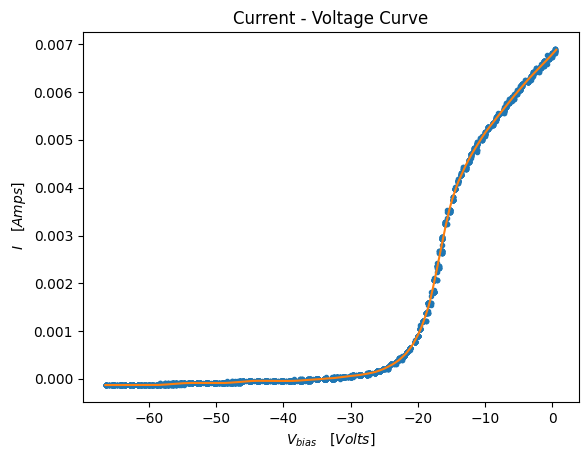

In [ ]:
#path = (Path.cwd() / ".." / "langmuir_samples" / "Pace2015.npy").resolve()
bias0, current0 = Pace2015_I_V
bias1, current1 = Beckers2017_I_V
bias2, current2 = Beckers2017_noisy_I_V
bias3, current3 = Beckers2017b_I_V

# Smooth
n_smooth = int(len(bias0)*(10/100))

bias = savgol_filter(bias0, n_smooth, 3)*u.volt
current = savgol_filter(current0, n_smooth, 3)*u.amp

# Plot
xpoints = bias
ypoints = current

plt.plot(bias0,current0, ".")
#plt.plot(bias1,current1, ".")
#plt.plot(bias2,current2, ".")
#plt.plot(bias3,current3, ".")
plt.plot(xpoints,current)
plt.title("Current - Voltage Curve")
plt.xlabel(r"$V_{bias} \quad \left[Volts \right]$")
plt.ylabel(r' $I \quad \left[Amps\right]$')
plt.show()

##Ion saturation current density

Consider first a surface biased to a large negative voltage. If the voltage is large enough, essentially all electrons (and any negative ions) will be repelled. The ion velocity will satisfy the Bohm sheath criterion, which is, strictly speaking, an inequality, but which is usually marginally fulfilled. The Bohm criterion in its marginal form says that the ion velocity at the sheath edge is simply the sound speed given by

$$c_s = \sqrt{k_B(ZT_e+\gamma_iT_i)/m_i}$$

The ion temperature term is often neglected, which is justified if the ions are cold. Even if the ions are known to be warm, the ion temperature is usually not known, so it is usually assumed to be simply equal to the electron temperature. In that case, consideration of finite ion temperature only results in a small numerical factor. *Z* is the (average) charge state of the ions, and $\gamma_i$ is the adiabatic coefficient for the ions.

The charge density of the ions depends on the charge state *Z*, but quasineutrality allows one to write it simply in terms of the electron density as $q_e n_e$, where $q_e$ is the charge of an electron and $n_e$ is the number density of electrons.

Using these results, we have the current density on the surface due to the ions. The current density at large negative voltages is due solely to the ions and, except for possible sheath expansion effects, does not depend on the bias voltage, so it is referred to as the ***ion saturation current density*** and is given by $j_i^{max} = Zq_{e}n_ic_s$ where $c_s$ is as defined above.

The plasma parameters, in particular, the density, are those at the sheath edge.

For $\quad T_e>>T_i$ and $Z=1$ we have:

$I_{is} =\alpha j_i^{max}A= \textrm{exp}(-1/2) q_e A_p n_i \sqrt{\frac{k_BT_{e}}{m_i}}$

To find the ion saturation current, we just find the minimum current of our I-V curve: $I_{is} = \textrm{min} \left(I(V) \right)$

In [ ]:
I_is = np.min(current)
I_I_is = current-I_is
print("I_is = ",I_is)

I_is =  -0.00013054119231403028 A


##Exponential electron current

As the voltage of the Debye sheath is reduced, the more energetic electrons are able to overcome the potential barrier of the electrostatic sheath. We can model the electrons at the sheath edge with a Maxwell–Boltzmann distribution, i.e.,

$$f(v_x)\,dv_x \propto e^{-\frac{1}{2}m_ev_x^2/k_BT_e}$$


Except that the high-energy tail moving away from the surface is missing, because only the lower-energy electrons moving toward the surface are reflected. The higher energy electrons overcome the sheath potential and are absorbed. The mean velocity of the electrons that are able to overcome the voltage of the sheath is

$$
\langle v_e \rangle = \frac
{\int_{v_{e0}}^\infty f(v_x)\,v_x\,dv_x}
{\int_{-\infty}^\infty f(v_x)\,dv_x}
$$

where the cut-off velocity for the upper integral is

$$v_{e0} = \sqrt{2q_{e}\Delta V/m_e}$$

$\Delta V = V_P - V$ is the voltage across the Debye (plasma) sheath, that is, the potential at the sheath edge minus the potential of the surface. For a large voltage compared to the electron temperature, the result is

$$
\langle v_e \rangle =
\sqrt{\frac{k_BT_e}{2\pi m_e}}\,
e^{-q_{e}\Delta V/k_BT_e}
$$


$$
j_e = q_{e}n_e\langle v_e \rangle=q_{e}n_e\sqrt{\frac{k_BT_e}{2\pi m_e}}\,
e^{-q_{e}\Delta V/k_BT_e}
$$

To simplify notation and analysis, we can define a new variable to translate the temperature units into voltage units to match our potential energy data $ q_e\Delta V$. This new variable is in units of electron volts, which is an energy unit that is equivalent to the amount of kinetic energy gained by a single electron accelerating from rest through an electric potential difference of one volt in a vacuum: $T_{eV}=k_BT_e$. Sometimes, we also replace $q_e$ with $e$ for simplicity.

Now we can write an equation for the electron current as a function of voltage:

$$I_e =j_eA=q_{e}n_e\langle v_e \rangle A= I_{es} \textrm{exp} \left(
-\frac{V_P - V}{T_{eV}} \right)$$

## Plasma potential

The method used in the function takes the maximum gradient of the probe current as the ‘knee’ of the transition from exponential increase into the electron saturation region.

$$V_p \Leftarrow \textrm{max} \left(\dfrac{dI(V)}{dV} \right)$$

V_plasma =  -16.724481517855782 V
I_es =  0.002724571241390798 A


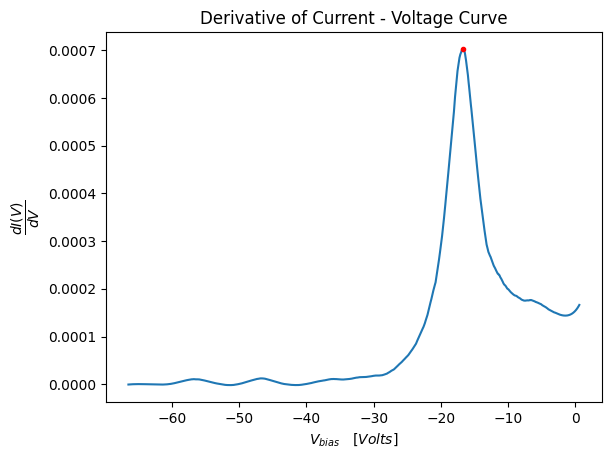

In [ ]:
# Calculate d(I(V))/dV
dI_dV = np.diff(current)/np.diff(bias)

#Smooth d(I(V))/dV
dI_dV = savgol_filter(dI_dV, n_smooth, 3)

ypoints= dI_dV;
xpoints = ((bias[:-1]+bias[1:])/2)

# Find plasma potential (at max of d(I(V))/dV)
dI_dV_max = np.max(dI_dV)
n_p = np.where(dI_dV == dI_dV_max)
[V_p] = xpoints[n_p]
[I_es] = ((I_I_is[:-1]+I_I_is[1:])/2)[n_p]
print("V_plasma = ", V_p)
print("I_es = ", I_es)

# Plot d(I(V))/dV
plt.plot(xpoints, ypoints)
plt.plot(V_p, dI_dV_max, ".r")
plt.title("Derivative of Current - Voltage Curve")
plt.xlabel(r"$V_{bias} \quad \left[Volts \right]$")
plt.ylabel(r"$\dfrac{dI(V)}{dV}$")
plt.show()

##Electron temperature

To find the electron temperature, we will try to find the slope of the inflection point of the natural log of the I-V curve and then find the reciprocal of that value. We can achieve all this by finding the minimum of the ratio of the ion saturation corrected I-V characteristic curve and its derivative with respect to voltage:

$$T_{eV}=\textrm{min}\left(\dfrac{I(V)-I_{is}}{\dfrac{dI(V)}{dV}}\right)$$

Always do this operation in a region where the collected current is positive $(I>0)$.

###Problem 1: Finding extreme values, minimisation

Calculate the plasma temperature by using `np.min` and `np.where`. It can be done in one line. The derivative has been done for you.

T_eV =  3.1727399455131358 A  eV


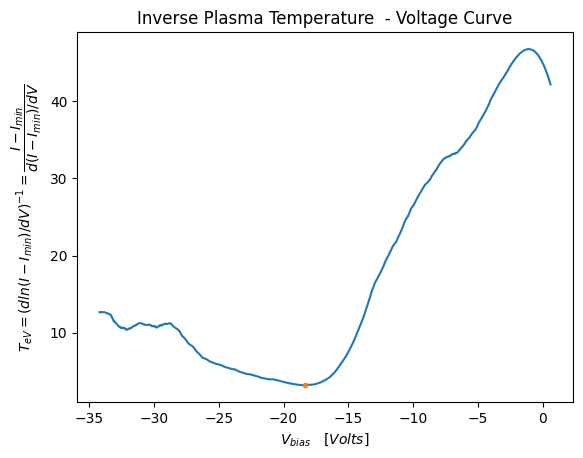

In [ ]:
xpoints = ((bias[:-1]+bias[1:])/2)
T_e_V = ((I_I_is[:-1]+I_I_is[1:])/2)/dI_dV;

#Get min point
T_e = np.min(T_e_V[np.where((current[1:] > 0))])

print("T_eV = ", T_e, " eV")

n_Te = np.where(T_e == T_e_V)
V_Te = bias[n_Te]

# Plot
plt.plot(xpoints[np.where((current[1:] > 0))], T_e_V[np.where((current[1:] > 0))])
plt.plot(V_Te, T_e, ".")
plt.title("Inverse Plasma Temperature  - Voltage Curve")
plt.xlabel(r"$V_{bias} \quad \left[Volts \right]$")
plt.ylabel(r"$T_{eV}=(dln(I-I_{min})/dV)^{-1}=\dfrac{I-I_{min}}{d(I-I_{min})/dV}$")
plt.show()

## Fitting

In the electron growth region of the probe characteristic the electron current grows exponentially with bias voltage:

$$I = I_e(V)+I_{is} = I_{es} \textrm{exp} \left(
-\frac{\left(V_P - V \right)}{T_{eV}} \right) + I_{is}$$

We can plot this theoretical I-V curve with our measured I-V characteristic data for values below the plasma potential to get an idea of how well we did performing this fit.

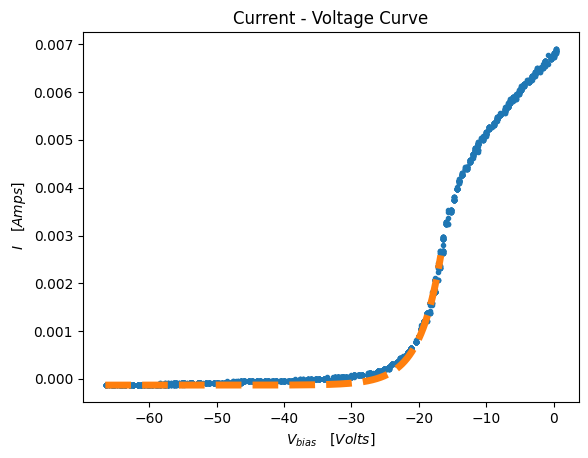

In [ ]:
xpoints = bias[np.where(bias<=V_p)]
I_fit = I_es*np.exp((xpoints-V_p).value/T_e.value)+I_is

# Plot
plt.plot(bias0,current0, ".")
plt.plot(xpoints,I_fit, '--', linewidth=5)
plt.title("Current - Voltage Curve")
plt.xlabel(r"$V_{bias} \quad \left[Volts \right]$")
plt.ylabel(r' $I \quad \left[Amps\right]$')
plt.show()

###Problem 2

Now we will improve the curve fit using `scipy_optimise`.

First, we define the function

In [ ]:
def func(xpoints, I_es, I_is, V_p, T_e):
     return I_es * np.exp((xpoints - V_p)/T_e) + I_is

Use `curce_fit` to fit your fuction to the data. Here is the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

In [ ]:
from scipy.optimize import curve_fit

params =  curve_fit(func, bias0[np.where(bias0 <=V_p.value)], current0[np.where(bias0 <=V_p.value)], p0=[I_es.value, I_is.value, V_p.value, T_e.value])

print([params[0]])
print([I_es.value, I_is.value, V_p.value, T_e.value])

V_p = params[0][2]*V_p.unit
T_e = params[0][3]*T_e.unit


[array([ 2.11230915e-03, -7.02203709e-05, -1.74209903e+01,  3.60507013e+00])]
[np.float64(0.002724571241390798), np.float64(-0.00013054119231403028), np.float64(-16.724481517855782), np.float64(3.1727399455131358)]


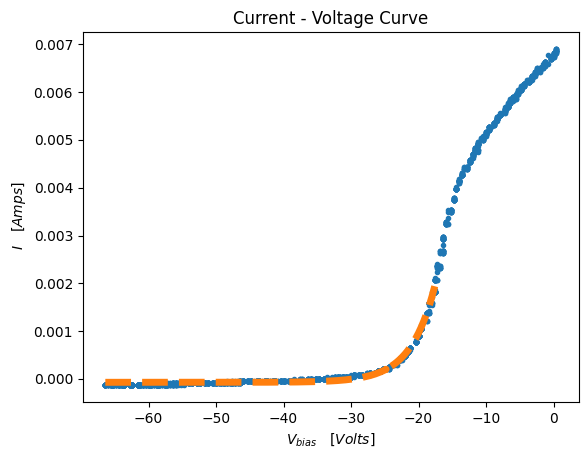

In [ ]:
I_fit = params[0][0]*np.exp((bias0[np.where(bias0<=V_p.value)]-params[0][2])/params[0][3])+params[0][1]

# Plot
plt.plot(bias0,current0, ".")
plt.plot(bias0[np.where(bias0<=V_p.value)],I_fit, '--', linewidth=5)
plt.title("Current - Voltage Curve")
plt.xlabel(r"$V_{bias} \quad \left[Volts \right]$")
plt.ylabel(r' $I \quad \left[Amps\right]$')
plt.show()

##Plasma density

### Electron density

The equation solved here obtains the electron density from the electron saturation current density, assuming a low plasma density. The electron saturation current is given by:

$$I_{es} = q_e n_e A_p \sqrt{\frac{T_{eV}}{2\pi m_e}}$$

Therefore:

$$n_e =\frac{I_{es}\sqrt{\frac{2\pi m_e}{T_{eV}}}}{A_p \cdot q_e}  $$

In [ ]:
A = 0.738 * u.cm ** 2

m_Ar = 39.948*cds.u
m_e = cds.me
Z = 1
q_e = cds.e
k_B = cds.k

T_eV = (T_e.value)*cds.eV

j_es = I_es/A
n_e = np.sqrt(2*np.pi*m_e/T_eV)*j_es/q_e

print("n_e = ", "{:e}".format(n_e.decompose()))

n_e =  7.253603e+14 1 / m3


Please note that the electron saturation current density is a hard parameter to acquire, and it is usually better to measure the ion density, which should be identical to the electron density in quasineutral plasmas.

###Ion density
The equation solved here obtains the ion density from the ion saturation current density, assuming that the ion current loss to the probe is equal to the Bohm loss. The acoustic Bohm velocity is obtained from the electron temperature and the ion mass.

The ion saturation current is given by:

$$I_{is} = -\textrm{exp}(-1/2) q_e A_p n_i \sqrt{\frac{\pi T_{eV}}{m_i}}$$

Therefore:

$$n_i=\frac{\textrm{exp}(1/2)}{\sqrt{\pi}}\frac{-I_{is} }{A_p \cdot  q_e}\sqrt{\frac{m_i}{T_{eV}}}$$

In [ ]:
#T_iV = (T_e.value)*cds.eV
j_is = -I_is/A
n_i = np.sqrt(m_Ar/(Z*T_eV))*j_is/q_e#np.exp(1/2)*

print("n_i = ", "{:e}".format(n_i.decompose()))

n_i =  3.741458e+15 1 / m3


#BREAK

In [ ]:
#check python version, should be 3.9.xx
!python --version

#check Matplotlib version, should be 3.7.X
mpl_old = matplotlib.__version__
print("Matplotlib " + mpl_old)

Python 3.11.12
Matplotlib 3.10.0


In [ ]:
if('mpl_new' not in locals()):
  #install python 3.9
  !sudo apt-get install python3.9
  !sudo apt-get update -y
  #install matplotlib
  !pip install matplotlib --upgrade
  #install plasmapy
  !pip install plasmapy
  mpl_new = matplotlib.__version__

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9-minimal
Suggested packages:
  python3.9-venv binfmt-support
The following NEW packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9 python3.9-minimal
0 upgraded, 4 newly installed, 0 to remove and 30 not upgraded.
Need to get 4,846 kB of archives.
After this operation, 18.9 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-minimal amd64 3.9.22-1+jammy1 [837 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-minimal amd64 3.9.22-1+jammy1 [2,072 kB]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-stdlib amd64 3.9.22-1+jammy1 [1,844 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu ja

# PlasmaPy

In [ ]:
from plasmapy.diagnostics.langmuir import Characteristic, swept_probe_analysis

In [ ]:
# Create the Characteristic object, taking into account the correct units
characteristic = Characteristic(u.Quantity(bias0, u.V), u.Quantity(current0, u.A))

/usr/local/lib/python3.11/dist-packages/plasmapy/diagnostics/langmuir.py:37: FutureWarning: The plasmapy.diagnostics.langmuir module will be deprecated in favor of the plasmapy.analysis.swept_langmuir sub-package and phased out over 2021.  The plasmapy.analysis package was released in v0.5.0.
  warnings.warn(


## Single Maxwellian

{'V_P': <Quantity -16.4 V>,
 'V_F': <Quantity -35.6 V>,
 'I_es': <Quantity 0.00282382 A>,
 'I_is': <Quantity -0.000129 A>,
 'n_e': <Quantity 7.60824394e+14 1 / m3>,
 'n_i': <Quantity 6.23732195e+15 1 / m3>,
 'T_e': <Quantity 3.51990715 eV>,
 'n_i_OML': <Quantity 3.07522416e+15 1 / m3>}

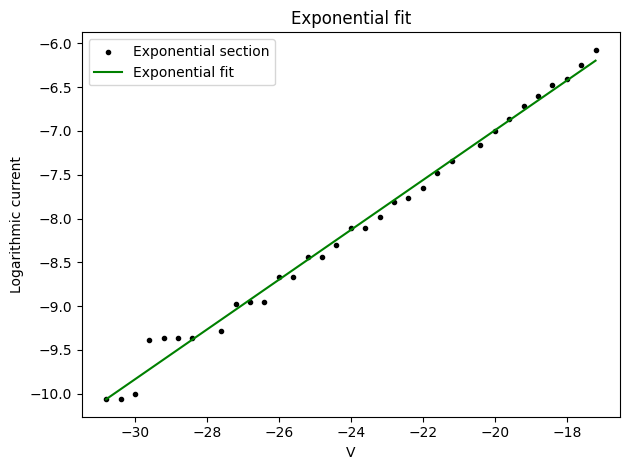

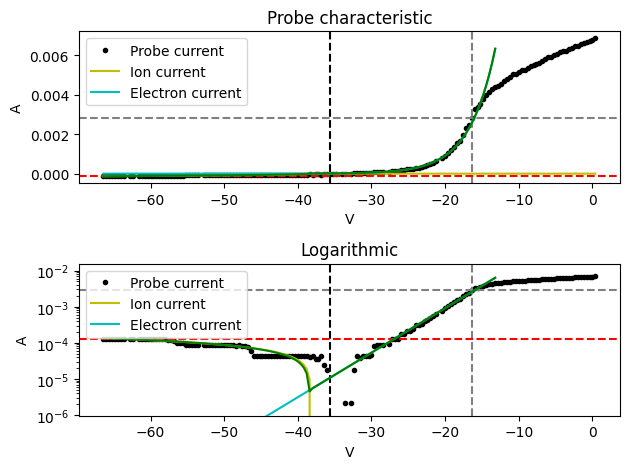

In [ ]:
swept_probe_analysis(
    characteristic,
    0.738 * u.cm ** 2,
    "Ar-40 1+",
    bimaxwellian=False,
    visualize=True,
    plot_electron_fit=True,
    plot_EEDF=False,
)